In [13]:
#Problem Statement: You're going out, do you need umbrella.

#States: Rainy, Cloudy and Sunny
#Actions: Umbrella & No umbrella
#Reward: Dict mapping with each state action pair
#Transition Prob
#Discount Factor

In [14]:
import numpy as np
import matplotlib.pyplot as plt

Optimal policy:
{'Rainy': 'Umbrella', 'Cloudy': 'Umbrella', 'Sunny': 'No Umbrella'}


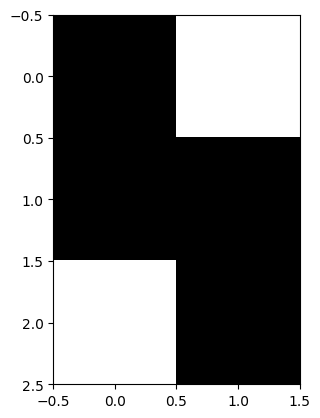

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Define the MDP parameters
states = ['Rainy', 'Cloudy', 'Sunny']
actions = ['Umbrella', 'No Umbrella']
rewards = {'Rainy': {'Umbrella': -1, 'No Umbrella': -5},
           'Cloudy': {'Umbrella': -1, 'No Umbrella': -1},
           'Sunny': {'Umbrella': -5, 'No Umbrella': -1}}
transitions = {'Rainy': {'Umbrella': {'Rainy': 0.7, 'Cloudy': 0.3, 'Sunny': 0},
                         'No Umbrella': {'Rainy': 0.3, 'Cloudy': 0.4, 'Sunny': 0.3}},
               'Cloudy': {'Umbrella': {'Rainy': 0.4, 'Cloudy': 0.6, 'Sunny': 0},
                          'No Umbrella': {'Rainy': 0, 'Cloudy': 0.7, 'Sunny': 0.3}},
               'Sunny': {'Umbrella': {'Rainy': 0, 'Cloudy': 0, 'Sunny': 1},
                         'No Umbrella': {'Rainy': 0, 'Cloudy': 0.4, 'Sunny': 0.6}}}
discount_factor = 0.9

#Fn for value iter
def value_iteration():
    #init, the value fn for each state to 0 
    V = {s: 0 for s in states}
    while True:
        #compute the updated value fn for each state
        new_V = {}
        for s in states:
            values = []
            for a in actions:
                value = rewards[s][a]
                for s2 in states:
                    value += discount_factor * transitions[s][a][s2] * V[s2]
                values.append(value)
            new_V[s] = max(values)
        # Check convergence
        if all(abs(V[s] - new_V[s]) < 0.0001 for s in states):
            return new_V
        V = new_V
V = value_iteration()

#compute optimal policy
policy = {}
for s in states:
    values = []
    for a in actions:
        value = rewards[s][a]
        for s2 in states:
            value += discount_factor * transitions[s][a][s2] * V[s2]
        values.append(value)
    policy[s] = actions[np.argmax(values)]

print("Optimal policy:")
print(policy)

# Plot
policy_values = np.zeros((len(states), len(actions)))
for i, s in enumerate(states):
    for j, a in enumerate(actions):
        policy_values[i, j] = rewards[s][a] + discount_factor * sum(transitions[s][a][s2] * V[s2] for s2 in states)
plt.imshow(policy_values, cmap='Greys')